# **Instalar o OSMnx e outras bibliotecas necessárias:**

In [5]:
# Instalação da biblioteca
pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.9 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [6]:
# Checagem da versão da biblioteca
import networkx as nx
import osmnx as ox

ox.__version__

'1.9.4'

# **Baixar a rede viária de Felipe Camarão:**

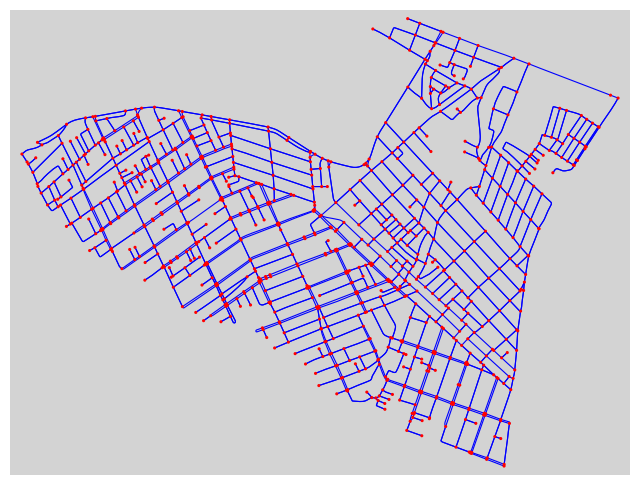

In [ ]:
# Download dos dados da rede viária do bairro de Felipe Camarão
G = ox.graph_from_place("Felipe Camarão ,Natal, Rio Grande do Norte, Brasil", network_type="drive") # Visualização para veículos motorizados (carros, caminhões, motos, etc.).

# Personalizando o grafo
fig, ax = ox.plot_graph(
    G,
    node_color="red",        # Cor dos nós
    node_size=5,             # Tamanho dos nós
    edge_color="blue",       # Cor das arestas
    edge_linewidth=0.8,      # Largura das arestas
    bgcolor="lightgray"      # Cor de fundo do gráfico
)

No mapa gerado pelo OSMnx, os nós e as arestas representam elementos fundamentais da rede viária:

1. Nós (Nodes):
Os nós correspondem a interseções, cruzamentos, ou pontos onde as ruas começam ou terminam (como entradas/saídas e entroncamentos).

2. Arestas (Edges):
As arestas são as ruas ou segmentos de ruas que conectam dois nós. Elas representam os trechos viários percorríveis entre interseções ou outros pontos significativos da rede.


# **Análise de algumas métricas**

Para uma melhor análise escolhi como bairro base, o bairro de Felipe Camarão, bairro em que resido, e como maneira de obter uma melhor visualização dos resultados utilizei do bairro da Redinha para fazer comparativos.

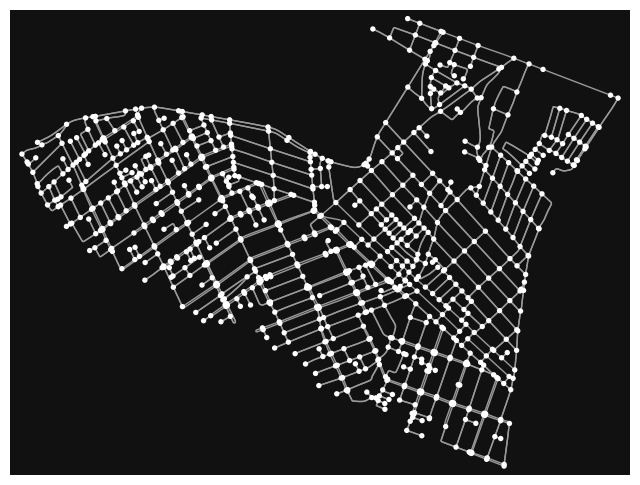

In [24]:
# Baixar a rede viária para veículos do bairro Felipe Camarão
G_drive = ox.graph_from_place("Felipe Camarão, Natal, Rio Grande do Norte, Brasil", network_type="drive")
fig, ax = ox.plot_graph(G_drive)

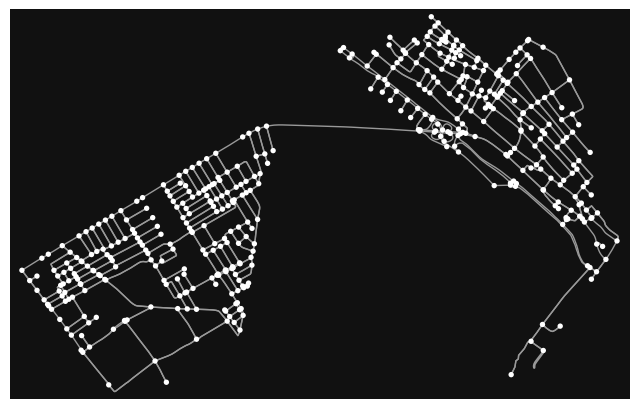

In [34]:
import osmnx as ox
import matplotlib.pyplot as plt
# Baixar a rede viária para veículos do bairro da Redinha
G = ox.graph_from_place("Redinha, Natal, Rio Grande do Norte, Brasil", network_type="drive")
fig, ax = ox.plot_graph(G)

# Pergutas

1. **Quantos componentes conectados existem na rede viária de Felipe Camarão e qual é o tamanho do maior componente conectado (componente gigante)?**


Componentes conectados são sub-redes em que todos os pontos (interseções ou nós) estão conectados uns aos outros.
O número total de componentes conectados **indica quantas partes isoladas existem na rede.** Se houver muitos componentes, isso pode indicar fragmentação, como ruas sem saída ou vias desconectadas.
O tamanho do maior componente (componente gigante) mostra a maior parte conectada da rede, o que é essencial para entender a acessibilidade geral da área.

Importância: Avaliar se a maioria das ruas do bairro está conectada de maneira que permite o fluxo contínuo de tráfego e pedestres.

Número total de componentes conectados: 1
Tamanho do maior componente conectado: 901


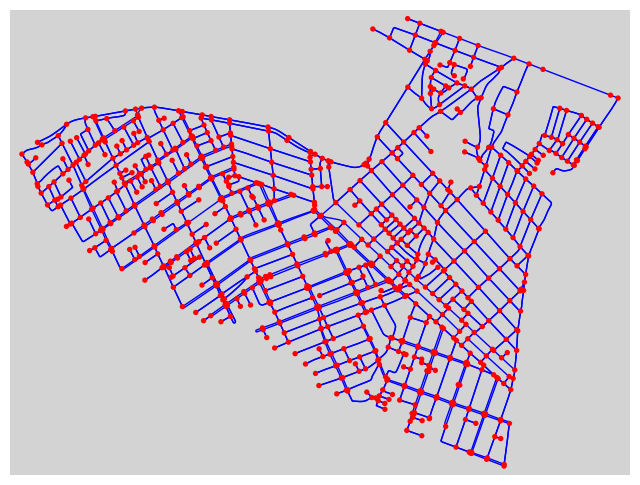

In [9]:
import osmnx as ox
import networkx as nx

# Baixar a rede viária para veículos do bairro Felipe Camarão
G = ox.graph_from_place("Felipe Camarão, Natal, Rio Grande do Norte, Brasil", network_type="drive")

# Encontrar os componentes conectados da rede
connected_components = list(nx.strongly_connected_components(G))

# Número total de componentes conectados
num_components = len(connected_components)
print(f"Número total de componentes conectados: {num_components}")

# Encontrar o maior componente conectado (componente gigante)
largest_component = max(connected_components, key=len)
G_largest = G.subgraph(largest_component).copy()
largest_component_size = len(largest_component)
print(f"Tamanho do maior componente conectado: {largest_component_size}")

# Visualizar o maior componente conectado
fig, ax = ox.plot_graph(G_largest, node_color="red", edge_color="blue", bgcolor="lightgray")


Explicação

Número total de componentes conectados: 1

Isso significa que toda a rede viária de Felipe Camarão é fortemente conectada.
Em termos simples, **todas as interseções e ruas da rede estão conectadas** de forma que **é possível**, respeitando as direções das vias, **se deslocar de qualquer ponto da rede para qualquer outro ponto**.
Um valor de 1 indica que não existem partes isoladas ou fragmentadas; ou seja, todas as ruas fazem parte de um único grande componente.


Tamanho do maior componente conectado: 900

Este valor indica que o maior componente conectado (ou componente gigante) contém 900 nós. Como o número total de componentes conectados é 1, significa que a rede inteira é composta por esses 900 nós, o que **representa todos os cruzamentos, interseções, e pontos importantes do sistema viário no bairro de Felipe Camarão**.
Este tamanho reflete a extensão e densidade da rede viária da região. Quanto maior o número de nós, mais complexa e conectada é a infraestrutura viária.


**2. Qual é o coeficiente de agrupamento (clustering coefficient) médio da rede?**

O coeficiente de agrupamento mede a probabilidade de que dois nós vizinhos de um nó também sejam vizinhos entre si, formando triângulos (ou ciclos pequenos) na rede. Em uma rede viária, um alto coeficiente de agrupamento indica que há muitas interseções que formam rotas alternativas e conexões locais redundantes, melhorando a robustez da rede e oferecendo múltiplos caminhos para um mesmo destino.

Importância: Avaliar a conectividade local e a flexibilidade do tráfego, identificando se há rotas alternativas para evitar congestionamentos.

In [31]:
import osmnx as ox
import networkx as nx

# Baixar a rede viária para veículos do bairro
G = ox.graph_from_place("Felipe Camarão, Natal, Rio Grande do Norte, Brasil", network_type="drive")

# Converter o multigrafo para um grafo simples
G_simple = nx.Graph(G)

# Calcular o coeficiente de agrupamento para cada nó
clustering_coeffs = nx.clustering(G_simple)

# Calcular o coeficiente de agrupamento médio
average_clustering_coeff = sum(clustering_coeffs.values()) / len(clustering_coeffs)

# Exibir o resultado
print(f"Coeficiente de agrupamento médio da rede: {average_clustering_coeff:.4f}")


Coeficiente de agrupamento médio da rede: 0.0499


Explicação

Um coeficiente de agrupamento médio de 0.0499 para a rede viária de Felipe Camarão indica algumas características importantes sobre a conectividade da área. Vamos explorar o que isso significa:

Um valor de 0.0499 é relativamente baixo, o que sugere que a maioria das interseções (nós) na rede viária não está muito interconectada com seus vizinhos.
Isso implica que há poucos triângulos (ou ciclos pequenos) formados entre as ruas, indicando uma falta de rotas alternativas próximas entre as interseções.
Essa baixa conectividade local pode indicar que, embora existam ruas, elas não se conectam eficientemente entre si. Isso pode ser um indicativo de ruas sem saída, layout urbano menos denso, ou áreas que não estão bem integradas com o restante da rede viária.

# **Baixar a rede viária do bairro da Redinha para comparação:**

Número total de componentes conectados: 5
Tamanho do maior componente conectado: 221


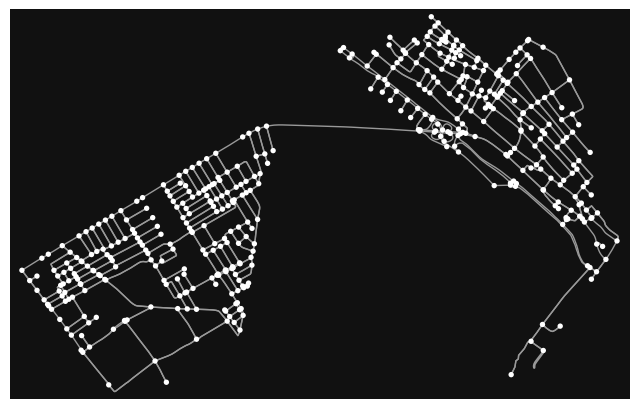

In [35]:
import osmnx as ox
import matplotlib.pyplot as plt
# Baixar a rede viária para veículos do bairro da Redinha
G = ox.graph_from_place("Redinha, Natal, Rio Grande do Norte, Brasil", network_type="drive")

# Encontrar os componentes conectados da rede
connected_components = list(nx.strongly_connected_components(G))

# Número total de componentes conectados
num_components = len(connected_components)
print(f"Número total de componentes conectados: {num_components}")

# Encontrar o maior componente conectado (componente gigante)
largest_component = max(connected_components, key=len)
G_largest = G.subgraph(largest_component).copy()
largest_component_size = len(largest_component)
print(f"Tamanho do maior componente conectado: {largest_component_size}")

# Visualizar o maior componente conectado
fig, ax = ox.plot_graph(G)

Explicação

Enquanto a rede viária de Felipe Camarão forma um único componente conectado, ou seja, todas as ruas e interseções (nós) no bairro estão diretamente interligadas, o motorista pode chegar a qualquer ponto do bairro sem sair da rede viária local. Todas as ruas, interseções e áreas do bairro são parte de uma grande rede contínua. Diferente o bairro da Redinha, onde apresenta 5 zonas separadas, e dentro de cada zona, o motorista pode se mover livremente.
No entanto, ele não consegue passar diretamente de uma zona para outra usando apenas as ruas da Redinha — precisaria sair da rede viária local para se conectar a outro componente.

In [29]:
import osmnx as ox
import networkx as nx

# Baixar a rede viária para veículos do bairro da Redinha
G = ox.graph_from_place("Redinha, Natal, Rio Grande do Norte, Brasil", network_type="drive")

# Converter o multigrafo para um grafo simples
G_simple = nx.Graph(G)

# Calcular o coeficiente de agrupamento para cada nó
clustering_coeffs = nx.clustering(G_simple)

# Calcular o coeficiente de agrupamento médio
average_clustering_coeff = sum(clustering_coeffs.values()) / len(clustering_coeffs)

# Exibir o resultado
print(f"Coeficiente de agrupamento médio da rede: {average_clustering_coeff:.4f}")


Coeficiente de agrupamento médio da rede: 0.0270
